In [1]:
import numpy as np 
import fitsio
import matplotlib.pyplot as plt
from desitarget.cmx import cmx_targetmask
from collections import Counter

In [2]:
target_filename = "090000-unique_targ.fits"
data_main = fitsio.read(target_filename)

In [3]:
data_main

array([(9010, 489327, '3422p285',  861, 'PSF', 342.14616624, 4.9653314e+16, 28.60932051, 4.1101063e+16, [34920976.  ,        0.  ,        0.  ,        0.  ,        0.  ], 0.06976245, 1445.0256  , 2914.9512 , 3677.5244 ,  13.447202,  0.8564236 ,  0.12147848, 0.81341726, 0.87013316, 0.9251392 , 9.3084944e-09, 2.7171507e-09, 3.8712811e-09, 3.7171763e-01, 8.0160218e-01, 9.2616862e-01, 1.0000001 , 0.98481077, 0.8323881 , 5, 4, 5, 1101.7367 ,   0.     ,  0.      ,  883.03125,   0.     ,  0.      , 1545.7842  , 799.5918  , 200.31221 , 467.70923, 0.27220178, 0.1872817 , 0.00110292, 1.3543763e-05, 0.988247  , 0.99276567, 0.99845266, 0.99941546, 0, 2, 2, 1123.0494   , 2265.4507  , 2858.1096 , 1123.0494  , 2265.4507  , 2858.1096  , 2021.6879, 0, 0, 2268, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

(array([  93.,  496.,  993., 1567., 2743., 3913., 5205., 6475., 6370.,
        5095.]),
 array([11.5929365, 12.533604 , 13.474272 , 14.41494  , 15.355607 ,
        16.296274 , 17.236942 , 18.17761  , 19.118279 , 20.058945 ,
        20.999613 ], dtype=float32),
 <a list of 10 Patch objects>)

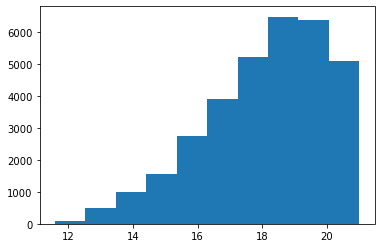

In [4]:
plt.hist(data_main['GAIA_PHOT_G_MEAN_MAG'])

32950


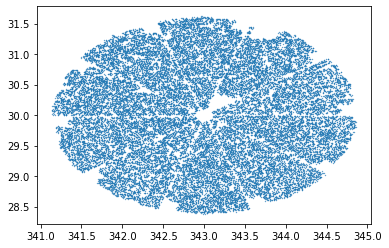

In [4]:
plt.scatter(data_main['RA'], data_main['DEC'], s=0.1)
print(len(data_main))

In [5]:
fba_main = fitsio.read("fiberassign-090000.fits")
fba_potential = fitsio.read("fiberassign-090000.fits", ext="POTENTIAL_ASSIGNMENTS")

In [6]:
count_potential = Counter(fba_potential['TARGETID'])

tid_to_include = []
for k in count_potential.keys():
    if (count_potential[k]==1) and (k>0):
        tid_to_include.append(k)
print(len(count_potential.keys()))
print(len(tid_to_include))
print(len(data_main['TARGETID']))


159086
144613
32950


32950


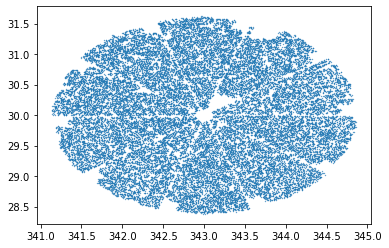

In [7]:
tin = np.isin(data_main['TARGETID'], tid_to_include)
print(np.count_nonzero(tin))

new_data = data_main[tin]
#new_filename = target_filename.replace("targ", "unique_targ")
#fitsio.write(new_filename, new_data)
#new_data = fitsio.read(new_filename)
plt.scatter(new_data['RA'], new_data['DEC'], s=0.1)

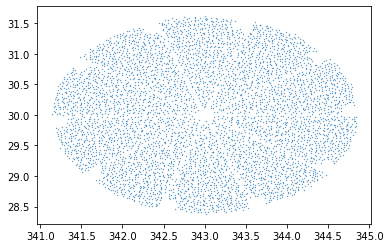

In [8]:
plt.scatter(fba_main['TARGET_RA'], fba_main['TARGET_DEC'], s=0.1)

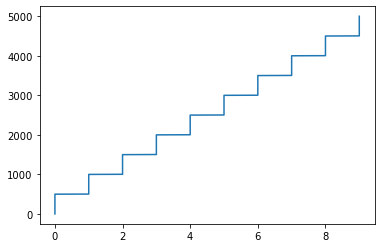

In [9]:
plt.plot(fba_main['PETAL_LOC'], fba_main['FIBER'])

In [10]:
target_masks = list(set(fba_main['CMX_TARGET']))
for t in target_masks:
    print(t, cmx_targetmask.cmx_mask.names(t))

32 ['STD_DITHER']
545 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS']
0 []
33 ['STD_GAIA', 'STD_DITHER']
144115188075855905 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS_FAINT']
34359738405 ['STD_GAIA', 'SV0_STD_BRIGHT', 'STD_DITHER', 'STD_BRIGHT']
8589935139 ['STD_GAIA', 'SV0_STD_FAINT', 'STD_DITHER', 'SV0_MWS', 'STD_FAINT']
42949673511 ['STD_GAIA', 'SV0_STD_FAINT', 'SV0_STD_BRIGHT', 'STD_DITHER', 'SV0_MWS', 'STD_FAINT', 'STD_BRIGHT']
40 ['STD_TEST', 'STD_DITHER']
42949672999 ['STD_GAIA', 'SV0_STD_FAINT', 'SV0_STD_BRIGHT', 'STD_DITHER', 'STD_FAINT', 'STD_BRIGHT']
180143985094823969 ['STD_GAIA', 'STD_DITHER', 'SV0_QSO', 'MINI_SV_QSO', 'SV0_MWS_FAINT']
34359738404 ['SV0_STD_BRIGHT', 'STD_DITHER', 'STD_BRIGHT']
544 ['STD_DITHER', 'SV0_MWS']
4641 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS', 'SV0_QSO']


Text(0.5, 1.0, 'Good fibers without targets: 51')

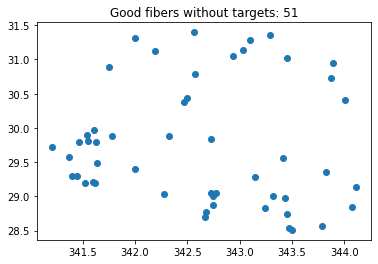

In [11]:
ii = (fba_main['CMX_TARGET']==0) & (fba_main['FIBERSTATUS']==0)
plt.scatter(fba_main['TARGET_RA'][ii], fba_main['TARGET_DEC'][ii])
plt.title('Good fibers without targets: {}'.format(np.count_nonzero(ii)))
#print(fba_main['TARGETID'][ii])

In [12]:
len(fba_main['DEVICE_LOC'])

5000

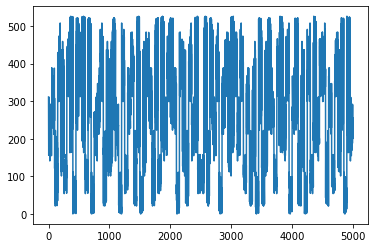

In [13]:
plt.plot(fba_main['DEVICE_LOC'])

In [14]:
max(fba_main['DEVICE_LOC'])

526

In [21]:
fiber_id = (fba_main['FIBER']%500)
for m in range(9):
    ii = (fiber_id & (2**m))!=0
    #print(fiber_id[ii])
    #print(np.count_nonzero(ii))
    tid_to_include = fba_main['TARGETID'][ii]
    fat = fba_main['FA_TYPE'][ii]
    #print(len(tid), min(tid), np.count_nonzero(tid<0), set(fat))
    
    
    tin = np.isin(data_main['TARGETID'], tid_to_include)
    print('{} targets in the original file'.format(len(data_main['TARGETID'])))

    new_data = data_main[tin]
    print('{} targets in the new file'.format(len(new_data['TARGETID'])))

    new_filename = target_filename.replace("targ", "unique_targ_m_{:02d}".format(m))
    fitsio.write(new_filename, new_data)
    print(new_filename)
    #print(i,np.count_nonzero(fba_main['DEVICE_LOC']==i))

# final parity check
m = 0
ii = ~((fiber_id & (2**m))!=0)
tid_to_include = fba_main['TARGETID'][ii]
tin = np.isin(data_main['TARGETID'], tid_to_include)
new_data = data_main[tin]
m = 9
new_filename = target_filename.replace("targ", "unique_targ_m_{:02d}".format(m))
fitsio.write(new_filename, new_data)
print(new_filename)

32950 targets in the original file
2116 targets in the new file
090000-unique_unique_targ_m_00.fits
32950 targets in the original file
2110 targets in the new file
090000-unique_unique_targ_m_01.fits
32950 targets in the original file
2082 targets in the new file
090000-unique_unique_targ_m_02.fits
32950 targets in the original file
2099 targets in the new file
090000-unique_unique_targ_m_03.fits
32950 targets in the original file
2052 targets in the new file
090000-unique_unique_targ_m_04.fits
32950 targets in the original file
2093 targets in the new file
090000-unique_unique_targ_m_05.fits
32950 targets in the original file
2064 targets in the new file
090000-unique_unique_targ_m_06.fits
32950 targets in the original file
2076 targets in the new file
090000-unique_unique_targ_m_07.fits
32950 targets in the original file
2041 targets in the new file
090000-unique_unique_targ_m_08.fits
090000-unique_unique_targ_m_09.fits


In [12]:
2^10

8

In [13]:
min(fba_main['DEVICE_LOC'])

0

In [17]:
np.count_nonzero(fba_main['FIBERSTATUS']!=0)

739

In [16]:
fba_main

array([(39628456757040830, 0, 311,  311,    0, 0, 342.61797698, 28.85489493,  2.1820874, -4.2833915, 2021.6824, 5400., 545, 1, 'TGT',   83.0029  , -284.73148, 1036, 0.55104913, 63, 9010, 490592, 5822, 'PSF',   21.77917 ,   61.58157,  100.12295, 5.6052930e+02, 1.1332840e+02, 5.6107620e+01,    0, 1884589558805580288, 'G2', 18.19793 , 18.89343 , 17.404846, 0.53869927, '3424p287', 0.07373312,   47.017654,   25.52796, 2.8172429 , 0.85401815,   16.945543,   47.914276,   77.901855,   16.945543,   47.914276,   77.901855, 0., 0., 0., 0., 'S', 1036, 1, 545, 0, 0, 0, 342.61797698, 28.85489493),
       (39628462054443684, 0, 272,  272,    1, 0, 342.72199602, 28.87923491, -1.9526088, -1.1351689, 2021.6824, 5400.,  32, 1, 'TGT',   60.223988, -278.22647, 1086, 0.51775091,  7, 9010, 491855, 2724, 'PSF', 2916.8562  , 6419.8945 , 6858.564  , 3.8368323e-01, 5.5562790e-02, 9.3342066e-03, 2300, 1884544551845783424, 'G2', 13.11398 , 13.684706, 12.415204, 0.26130798, '3427p290', 0.0648875 , 3998.9197  , 2069

In [22]:
import glob

In [24]:
fa_files = glob.glob("fiberassign-08*.fits")
fa_files.sort()
print(fa_files)

['fiberassign-082248.fits', 'fiberassign-082249.fits', 'fiberassign-082250.fits', 'fiberassign-082251.fits', 'fiberassign-082252.fits', 'fiberassign-082253.fits', 'fiberassign-082254.fits', 'fiberassign-082255.fits', 'fiberassign-082256.fits', 'fiberassign-082257.fits']


2118
[  1   3   5 ... 495 497 499]


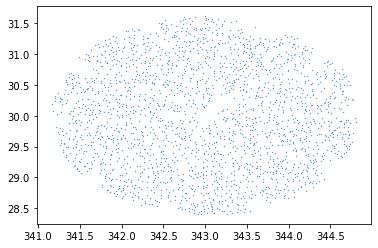

In [56]:
fba_data = fitsio.read(fa_files[0])
ii = fba_data['FLUX_R']>0
bit_fiber_id = (fba_data['FIBER'][ii]%500)
print(np.count_nonzero(ii))
plt.scatter(fba_data['TARGET_RA'][ii], fba_data['TARGET_DEC'][ii], s=0.1)
print(bit_fiber_id)

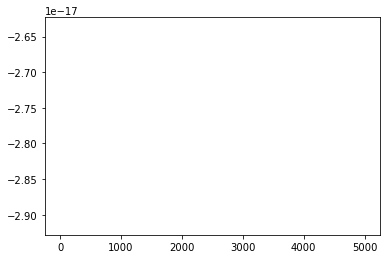

In [48]:
plt.scatter(fba_data['FIBER'][ii], fba_data['FLUX_R'][ii], s=0.1)

In [49]:
fba_data['FLUX_R'][ii]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [52]:
fba_data

array([(616089209064653814, 0, 311,  311,    0, 0, 342.62796601, 28.83198357,  0.       ,  0.        ,    0.    , 5400.,  4294967296, 4, 'SKY',   80.90406 , -290.66534,   -1, 0.97824268, 63, 9010, '3427p287', 490593, 1014, '', 0.        ,   0.      ,   0.     ,   0.     ,   0.     ,   0.      ,   0.     ,  0.      ,  0.      , 0.       , 0.        ,  5.4693338e-04,  6.6996957e-03, -6.4552292e-02,   0.     ,   0.     ,   0.     ,    0, 0., 0., 0., 0.,                   0, '',  0.      ,  0.      ,  0.     , 0.        , '',   -1, -1,           0, 4294967296, 0, 0, 342.62796601, 28.83198357),
       (616089214357864676, 0, 272,  272,    1, 0, 342.72891758, 28.91444918,  0.       ,  0.        ,    0.    , 5400.,  4294967296, 4, 'SKY',   58.625366, -269.1246 ,   -1, 0.95634167, 63, 9010, '3427p290', 491855,  228, '', 0.        ,   0.      ,   0.     ,   0.     ,   0.     ,   0.      ,   0.     ,  0.      ,  0.      , 0.       , 0.        ,  1.8814798e-02, -6.6184084e-04,  5.5994257e-02,   0